<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/Multi_food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network
### Multi class classification

In [4]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip



--2023-03-30 18:10:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.1MB/s    in 22s     

2023-03-30 18:10:38 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Essential functions

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
import pathlib

In [13]:
# visualing images
def view_random_img(target_dir,target_class):
    #targeting a directory
    target_folder = target_dir+"/"+target_class

    # getting random image path
    random_image = random.sample(os.listdir(target_folder),1)

    #reading image and ploting
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    # show input shape
    print(f"Image shape = {img.shape}") 
    return(img)

In [14]:
def model_details(model = None):
    return tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=True)

In [16]:
def loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs =  range(len(history.history['loss']))

    plt.plot(epochs,loss,label='loss')
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title('loss')
    plt.legend()

    plt.figure()

    plt.plot(epochs,accuracy,label='accuracy')
    plt.plot(epochs,val_accuracy,label='val_accuracy')
    plt.title('accuracy')
    plt.legend()

# Visualization

In [8]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"): 
  print(f"There are {dirnames} directories and {len(filenames)} images in '{dirpath}'.")

There are ['test', 'train'] directories and 0 images in '10_food_classes_all_data'.
There are ['steak', 'fried_rice', 'ice_cream', 'grilled_salmon', 'chicken_wings', 'sushi', 'pizza', 'chicken_curry', 'ramen', 'hamburger'] directories and 0 images in '10_food_classes_all_data/test'.
There are [] directories and 250 images in '10_food_classes_all_data/test/steak'.
There are [] directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are [] directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are [] directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are [] directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are [] directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are [] directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are [] directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are [] directories a

In [9]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [11]:
# naming class
import numpy as np
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [12]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape = (384, 512, 3)


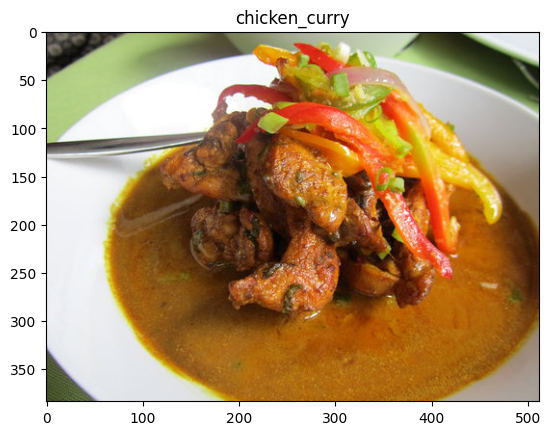

In [24]:
img = view_random_img(train_dir,random.choice(class_names))

# Preprocess

In [25]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# converting data into batches

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Building model

In [27]:
model1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           input_shape=(224,224,3),
           activation = 'relu',
           padding='valid'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

In [28]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)

In [30]:
history=model1.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 61s 210ms/step - loss: 2.2134 - accuracy: 0.1792 - val_loss: 1.9959 - val_accuracy: 0.2808
Epoch 2/5
235/235 [==============================] - 50s 213ms/step - loss: 1.9756 - accuracy: 0.3124 - val_loss: 1.9347 - val_accuracy: 0.3156
Epoch 3/5
235/235 [==============================] - 58s 246ms/step - loss: 1.7126 - accuracy: 0.4200 - val_loss: 1.8154 - val_accuracy: 0.3708
Epoch 4/5
235/235 [==============================] - 49s 208ms/step - loss: 1.2664 - accuracy: 0.5772 - val_loss: 1.9389 - val_accuracy: 0.3464
Epoch 5/5
235/235 [==============================] - 49s 207ms/step - loss: 0.6545 - accuracy: 0.7903 - val_loss: 2.8185 - val_accuracy: 0.3072


In [31]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
model_details(model1)

In [33]:
model1.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 2.8185 - accuracy: 0.3072


[2.8184831142425537, 0.30720001459121704]

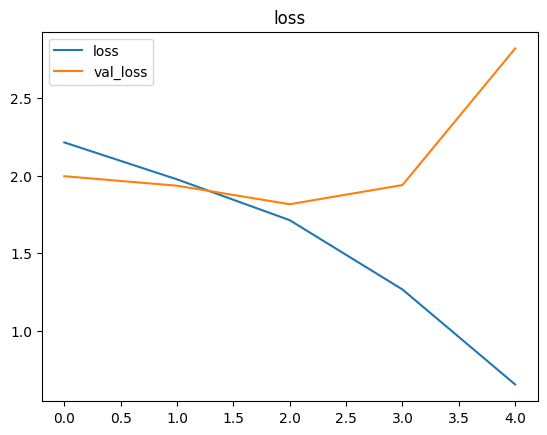

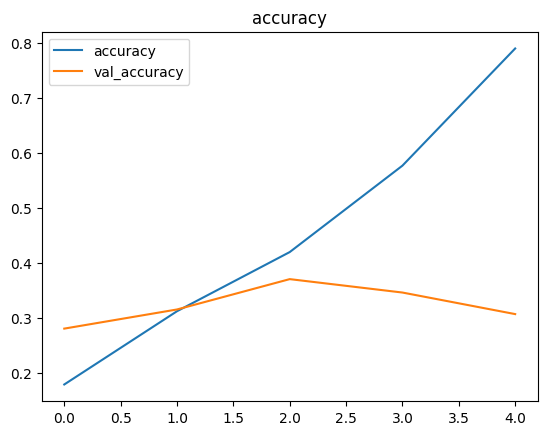

In [35]:
loss_curve(history)